<a href="https://colab.research.google.com/github/Swagaat/Math208/blob/main/MATH208(HW_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics for Glucose:
Mean: 130.06666666666666
Variance: 1075.0298850574711
Standard Deviation: 32.787648361196496
Z-Scores: [0.5469539363047783, -1.3745013417919332, 1.6144290908029513, -1.2525041812778563, 0.21146174489106678, -0.4290233478078371, -1.5879963726915678, -0.4595226379363563, 2.0414191526022205, -0.15452973665116398, -0.6120190885789525, 1.156939738875163, 0.27246032514810525, 1.7974248315740669, 1.0959411586181245, -0.9170119898641448, -0.3680247675507986, -0.7035169589645102, -0.8255141194785871, -0.4595226379363563, -0.12403044652264475, -0.9475112799926639, 2.0109198624737012, -0.33752547742227934, 0.39445748566218214, -0.15452973665116398, 0.5164546461762591, -1.0085098602497025, 0.4554560659192206, -0.3985240576793178]
Q1: 107
Median: 122.0
Q3: 147

Statistics for BloodPressure:
Mean: 68.53333333333333
Variance: 572.119540229885
Standard Deviation: 23.91902046969911
Z-Scores: [0.14493347129571138, -0.10591292133148125, -0.18952838554054546, -0.10591292133148125, 

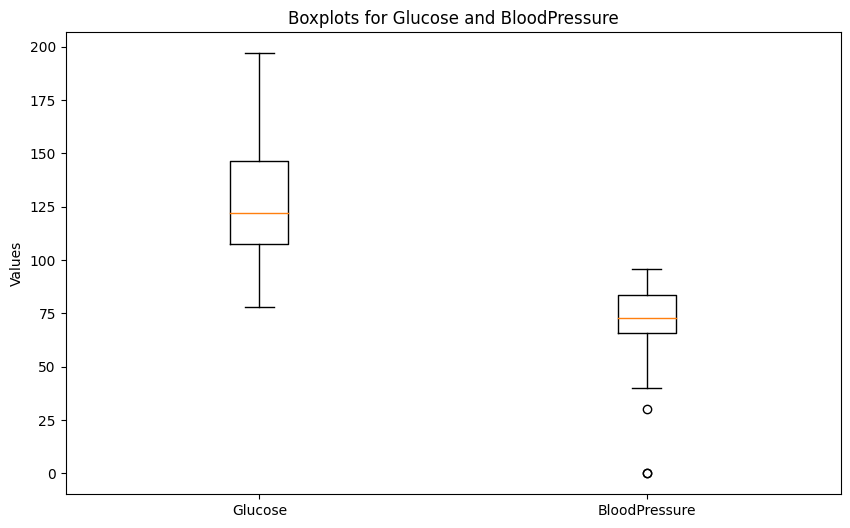

In [2]:
#Solution for 1:
import openpyxl
import matplotlib.pyplot as plt
import numpy as np

# A function to calculate the mean:
def cal_mean(data):
    data = [x for x in data if x is not None]  # Remove None values
    return sum(data) / len(data) if data else 0

# A function to calculate variance:
def cal_variance(data):
    data = [x for x in data if x is not None]  # Remove None values
    n = len(data)
    mean = cal_mean(data)
    return sum((x - mean) ** 2 for x in data) / (n - 1) if n > 1 else 0

# A function to calculate standard deviation
def cal_std_deviation(data):
    return cal_variance(data) ** 0.5

# A a function to calculate z-scores using formula
def cal_z_scores(data):
    data = [x for x in data if x is not None]  # Remove None values
    mean = cal_mean(data)
    std_dev = cal_std_deviation(data)
    return [(x - mean) / std_dev for x in data]

#  A function to calculate quartiles
def cal_quartiles(data):
    data = [x for x in data if x is not None]  # Remove None values
    data.sort()
    n = len(data)
    mid = n // 2
    if n % 2 == 0:
        q1 = cal_median(data[:mid])
        q3 = cal_median(data[mid:])
    else:
        q1 = cal_median(data[:mid])
        q3 = cal_median(data[mid + 1:])
    return q1, q3

# A function to calculate the median using the formula.
def cal_median(data):
    data = [x for x in data if x is not None]  # Remove None values
    data.sort()
    n = len(data)
    mid = n // 2
    if n % 2 == 0:
        median = (data[mid - 1] + data[mid]) / 2
    else:
        median = data[mid]
    return median

# Loading the Excel file
data = openpyxl.load_workbook("original_diabetes.xlsx")
sheet = data.active

# Extracting data from "Glucose" and "BloodPressure" columns
glucose_data = [cell.value for cell in sheet['B'][1:]]
blood_pressure_data = [cell.value for cell in sheet['C'][1:]]

glucose_data = [x for x in glucose_data if x is not None]
blood_pressure_data = [x for x in blood_pressure_data if x is not None]


# Here, Calculate statistics for Glucose
glucose_mean = cal_mean(glucose_data)
glucose_variance = cal_variance(glucose_data)
glucose_std_dev = cal_std_deviation(glucose_data)
glucose_z_scores = cal_z_scores(glucose_data)
glucose_q1, glucose_q3 = cal_quartiles(glucose_data)
glucose_median = cal_median(glucose_data)

# Now, Calculating statistics for blood pressure
bp_mean = cal_mean(blood_pressure_data)
bp_variance = cal_variance(blood_pressure_data)
bp_std_dev = cal_std_deviation(blood_pressure_data)
bp_z_scores = cal_z_scores(blood_pressure_data)
bp_q1, bp_q3 = cal_quartiles(blood_pressure_data)
bp_median = cal_median(blood_pressure_data)

# Here, printing the statistics.
print("Statistics for Glucose:")
print(f"Mean: {glucose_mean}")
print(f"Variance: {glucose_variance}")
print(f"Standard Deviation: {glucose_std_dev}")
print(f"Z-Scores: {glucose_z_scores}")
print(f"Q1: {glucose_q1}")
print(f"Median: {glucose_median}")
print(f"Q3: {glucose_q3}")

print("\nStatistics for BloodPressure:")
print(f"Mean: {bp_mean}")
print(f"Variance: {bp_variance}")
print(f"Standard Deviation: {bp_std_dev}")
print(f"Z-Scores: {bp_z_scores}")
print(f"Q1: {bp_q1}")
print(f"Median: {bp_median}")
print(f"Q3: {bp_q3}")

# Creating a boxplot for Glucose and blood pressure.
data_to_plot = [glucose_data, blood_pressure_data]
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=["Glucose", "BloodPressure"])
plt.title("Boxplots for Glucose and BloodPressure")
plt.ylabel("Values")
plt.show()

In [5]:
#Solution for question-2:
import random
import math

def gen_random_numbers(n):
    return [random.uniform(0, 1) for _ in range(n)]

def cal_mean(lst):
    return sum(lst) / len(lst)

def cal_std_deviation(lst):
    mean = cal_mean(lst)
    squared_diff = [(x - mean) ** 2 for x in lst]
    variance = sum(squared_diff) / (len(lst) - 1)
    return math.sqrt(variance)

def verify_Chebyshev_ineq(lst, k):
    mean = cal_mean(lst)
    std_dev = cal_std_deviation(lst)
    count = 0

    for num in lst:
        if abs(num - mean) < k * std_dev:
            count += 1

    return count

# Generating a list of 50 random numbers between 0 and 1
random_numbers = gen_random_numbers(50)

# Test cases
k = 1
cnt = verify_Chebyshev_ineq(random_numbers, k)
prob = 1 - 1 / (k ** 2)
print(f"\nProbability of |X-u| = {prob} is True")
print(f"When k = {k}, P(|X-u|<k*sd) >= 1-1/k^2 is True")


k = math.sqrt(2)  # k = 2
cnt = verify_Chebyshev_ineq(random_numbers, k)
prob = 1 - 1 / (k ** 2)
print(f"\nProbability of |X-u| = {prob} is True")
print(f"When k = {k}, P(|X-u|<k*sd) >= 1-1/k^2 is True")

k = 1.5
cnt = verify_Chebyshev_ineq(random_numbers, k)
prob = 1 - 1 / (k ** 2)
print(f"\nProbability of |X-u| = {prob} is True")
print(f"When k = {k}, P(|X-u|<k*sd) >= 1-1/k^2 is True")

k = 2
cnt = verify_Chebyshev_ineq(random_numbers, k)
prob = 1 - 1 / (k ** 2)
print(f"\nProbability of |X-u| = {prob} is True")
print(f"When k = {k}, P(|X-u|<k*sd) >= 1-1/k^2 is True")

k = 3
cnt = verify_Chebyshev_ineq(random_numbers, k)
prob = 1 - 1 / (k ** 2)
print(f"\nProbability of |X-u| = {prob} is True")
print(f"When k = {k}, P(|X-u|<k*sd) >= 1-1/k^2 is True")



Probability of |X-u| = 0.0 is True
When k = 1, P(|X-u|<k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 0.5000000000000001 is True
When k = 1.4142135623730951, P(|X-u|<k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 0.5555555555555556 is True
When k = 1.5, P(|X-u|<k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 0.75 is True
When k = 2, P(|X-u|<k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 0.8888888888888888 is True
When k = 3, P(|X-u|<k*sd) >= 1-1/k^2 is True


𝑏1 (Slope): 141.21212121212122
𝑏0 (Intercept): -466.8787878787879
Coefficient of Linear Correlation (r): 0.943579551890278


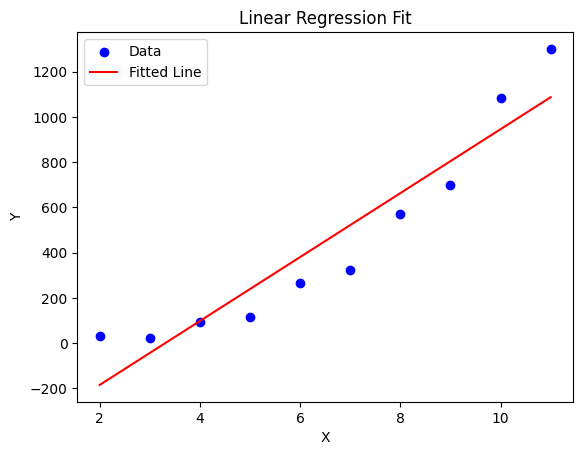

In [6]:
#Solution for Question-3:
import numpy as np
import matplotlib.pyplot as plt

# This is the given data.
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
Y = np.array([30, 25, 95, 115, 265, 325, 570, 700, 1085, 1300])

# Here, calculating the coefficient of b1 and b0
n = len(X)
mean_X = sum(X)/len(X)
mean_Y = sum(Y)/len(Y)
b1 = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X) ** 2)
b0 = mean_Y - b1 * mean_X

# Using the formula calculating the coefficient of linear correlation r.
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator_X = np.sqrt(np.sum((X - mean_X) ** 2))
denominator_Y = np.sqrt(np.sum((Y - mean_Y) ** 2))
r = numerator / (denominator_X * denominator_Y)

# Printing the output.
print("𝑏1 (Slope):", b1)
print("𝑏0 (Intercept):", b0)
print("Coefficient of Linear Correlation (r):", r)

# Now, Ploting the data and the straight fitting line
plt.scatter(X, Y, color='blue', label='Data')
Y_pred = b0 + b1 * X
plt.plot(X, Y_pred, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()
